# Trace Clustering in Process Mining

## Importing librarires

In [1]:
import pm4py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
from pm4py.objects.log.log import EventLog


## Importing log
Importing event log of RoadTraffic. It is in XES format with 51 traces.

In [4]:
# Importing a XES event log
from pm4py.objects.log.importer.xes import importer as xes_importer
log = xes_importer.apply('DataSets/Repair.xes')
#log[1],type(log)

parsing log, completed traces :: 100%|██████████| 1104/1104 [00:02<00:00, 483.50it/s]


## Petrinet from Alpha miner on complete log

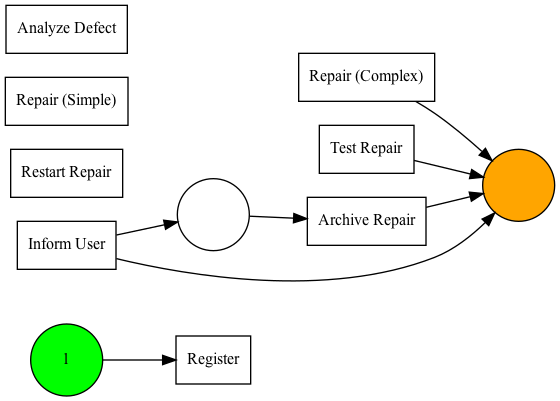

In [5]:
## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(log)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness

In [6]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, im, fm = alpha_miner.apply(log)
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
fitness = replay_fitness_evaluator.apply(log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
prec = precision_evaluator.apply(log, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
#prec
#fitness, type(fitness)
print('Fitness of log is: ', fitness['log_fitness']*100,'%')
print('Precision of log is: ', prec*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 233/233 [00:00<00:00, 382.18it/s]

Fitness of log is:  68.28336942892967 %
Precision of log is:  23.940950770631463 %


### Extracting total Activities

In [8]:
from pm4py.algo.filtering.log.attributes import attributes_filter
activities = attributes_filter.get_attribute_values(log, "concept:name")
resources = attributes_filter.get_attribute_values(log, "org:resource")
activities,resources

({'Register': 1104,
  'Analyze Defect': 2208,
  'Repair (Complex)': 1449,
  'Test Repair': 3016,
  'Inform User': 1102,
  'Archive Repair': 1000,
  'Repair (Simple)': 1570,
  'Restart Repair': 406},
 {'System': 3612,
  'Tester3': 910,
  'SolverC1': 534,
  'Tester2': 904,
  'SolverS1': 592,
  'Tester6': 876,
  'SolverS2': 498,
  'Tester4': 788,
  'Tester1': 902,
  'SolverS3': 480,
  'SolverC3': 401,
  'Tester5': 844,
  'SolverC2': 514})

### Converting activity keys in to a list

In [9]:
activities_array = activities.keys()
activities_array = list(activities_array)
activities_array


['Register',
 'Analyze Defect',
 'Repair (Complex)',
 'Test Repair',
 'Inform User',
 'Archive Repair',
 'Repair (Simple)',
 'Restart Repair']

### Getting activities of each Trace in a Dataframe

In [10]:
## Converting log in to a pandas dataframe
from pm4py.objects.conversion.log import converter as log_converter
dataframe = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)
#dataframe.to_csv('log.csv')
#dataframe
## Trace profiling on Activities
dataframe =dataframe[['case:concept:name','concept:name']]
dataframe

,case:concept:name,concept:name
0,1,Register
1,1,Analyze Defect
2,1,Analyze Defect
3,1,Repair (Complex)
4,1,Repair (Complex)
...,...,...
11850,999,Repair (Simple)
11851,999,Test Repair
11852,999,Test Repair
11853,999,Inform User


### Making np_array from Dataframe and grouping them on the basis of case identifier

In [11]:
np_arr = np.array(dataframe)
#np_arr
n = np.unique(np_arr[:,0])
events = np.array( [(np_arr[np_arr[:,0]==i,1]) for i in n] )
events

array([array(['Register', 'Analyze Defect', 'Analyze Defect', 'Repair (Complex)',
              'Repair (Complex)', 'Test Repair', 'Test Repair', 'Inform User',
              'Archive Repair'], dtype=object)                                   ,
       array(['Register', 'Analyze Defect', 'Analyze Defect', 'Repair (Simple)',
              'Repair (Simple)', 'Test Repair', 'Test Repair', 'Restart Repair',
              'Repair (Simple)', 'Inform User', 'Repair (Simple)', 'Test Repair',
              'Test Repair', 'Archive Repair'], dtype=object)                    ,
       array(['Register', 'Analyze Defect', 'Analyze Defect', 'Repair (Complex)',
              'Repair (Complex)', 'Test Repair', 'Test Repair', 'Inform User',
              'Archive Repair'], dtype=object)                                   ,
       ...,
       array(['Register', 'Analyze Defect', 'Analyze Defect', 'Repair (Complex)',
              'Repair (Complex)', 'Test Repair', 'Test Repair', 'Inform User',
            

## 2d Vector of Number of CASES X Number of Activities

In [12]:
length  = len(log)
width = len(activities)
length,width
vectors  = [ [0] * width for _ in range(length)]
type(vectors),len(vectors)
vectors

[[0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 

## Activities Profiling - Updating Vector with the count of occurence of Activities

In [13]:
for i in range(len(events)):
        for j in range(len(events[i])):
                if events[i][j] == activities_array[0]:
                    vectors[i][0] += 1
                elif events[i][j] == activities_array[1]:
                    vectors[i][1] += 1
                elif events[i][j] == activities_array[2]:
                    vectors[i][2] += 1
                elif events[i][j] == activities_array[3]:
                    vectors[i][3] += 1
                elif events[i][j] == activities_array[4]:
                    vectors[i][4] += 1
                elif events[i][j] == activities_array[5]:
                    vectors[i][5] += 1
                elif events[i][j] == activities_array[6]:
                    vectors[i][6] += 1
                elif events[i][j] == activities_array[7]:
                    vectors[i][7] += 1
                

### Making ND-Array of the Activity Vector

In [14]:
np_vectors = np.array(vectors)
np_vectors

array([[1, 2, 2, ..., 1, 0, 0],
       [1, 2, 0, ..., 1, 4, 1],
       [1, 2, 2, ..., 1, 0, 0],
       ...,
       [1, 2, 2, ..., 1, 0, 0],
       [1, 2, 2, ..., 1, 0, 0],
       [1, 2, 0, ..., 1, 4, 1]])

## Elbow Method to find optimal number of clusters

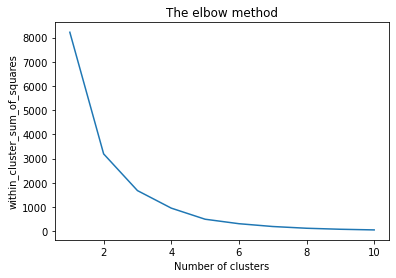

In [15]:
#  Elbow Method 
from sklearn.cluster import KMeans
within_cluster_sum_of_squares = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(np_vectors)
    within_cluster_sum_of_squares.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), within_cluster_sum_of_squares)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within_cluster_sum_of_squares') #within cluster sum of squares
plt.show()

# KMeans - Euclidean

In [16]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=0).fit(np_vectors)
kmeans.labels_
clustered  = kmeans.predict(np_vectors)
clustered


array([1, 0, 1, ..., 1, 1, 0], dtype=int32)

## Array of Sizes of clustered Data

In [17]:
count_arr = np.bincount(clustered)
print(count_arr)


[213 649 242]


## Creating Sub Event Logs based on Clustering Output

In [18]:
length1  = count_arr[0]
length2 = count_arr[1]
length3 = count_arr[2]

sub_log1 = EventLog()
sub_log2 = EventLog()
sub_log3 = EventLog()

for i in range(len(clustered)):
    if clustered[i] == 0:
        sub_log1.append(log[i])
    
    elif clustered[i] == 1:
        sub_log2.append(log[i])
        
    elif clustered[i] == 2: 
        sub_log3.append(log[i])

# Petrinets from Alpha miner on Sub Event Logs

## Petrinets from Alpha miner on Sub Event Log1

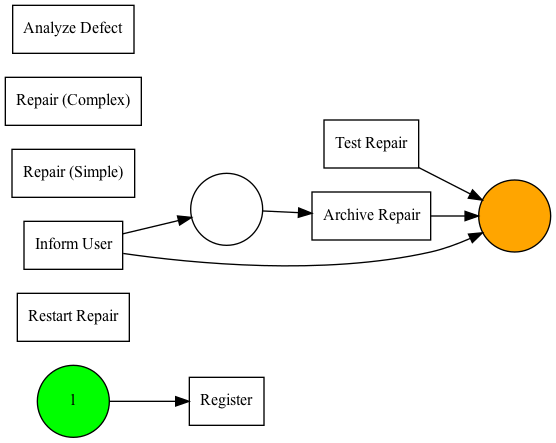

In [19]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log1)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog1

In [20]:
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
net, im, fm = alpha_miner.apply(sub_log1)
fitness = replay_fitness_evaluator.apply(sub_log1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')
#prec

replaying log with TBR, completed variants :: 100%|██████████| 130/130 [00:00<00:00, 657.05it/s]


Fitness of Petrinet is:  66.40916355887055 %
Precision of Petrinet is:  21.288180610889775 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log2

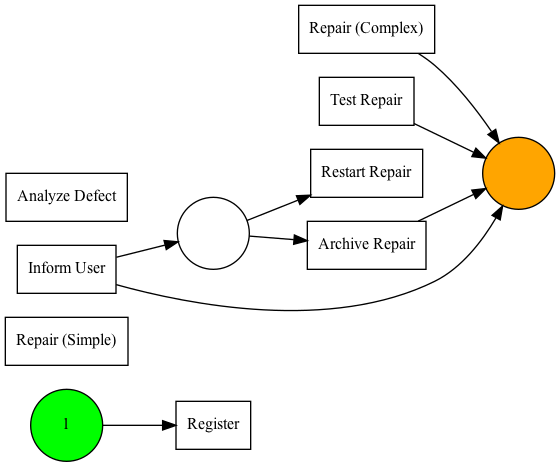

In [21]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log2)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog2

In [22]:

net, im, fm = alpha_miner.apply(sub_log2)
fitness = replay_fitness_evaluator.apply(sub_log2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')
#prec

replaying log with TBR, completed variants :: 100%|██████████| 127/127 [00:00<00:00, 798.59it/s]

Fitness of Petrinet is:  65.07171214647775 %
Precision of Petrinet is:  25.9800510322431 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log3

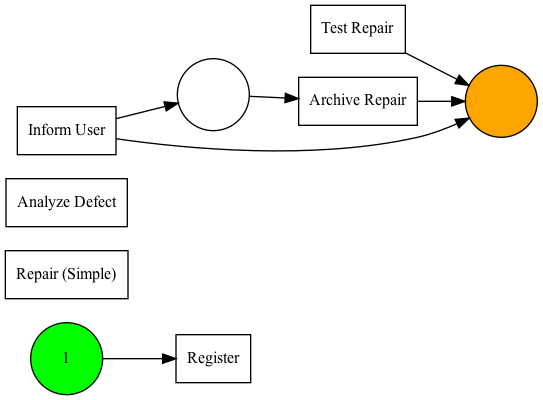

In [23]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log3)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of Sub event log

In [24]:
net, im, fm = alpha_miner.apply(sub_log3)
fitness = replay_fitness_evaluator.apply(sub_log3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 19/19 [00:00<00:00, 1846.98it/s]

Fitness of Petrinet is:  74.45460942997889 %
Precision of Petrinet is:  28.781157583438954 %
Simplicity of Petrinet is:  100.0 %


# DB SCAN

## Hamming Distance

In [27]:
from sklearn.cluster import DBSCAN
clustering_DB_Hamm = DBSCAN(eps=0.3, min_samples=1, metric ='hamming').fit(np_vectors)


clustering_DB_Hamm = clustering_DB_Hamm.fit_predict(np_vectors)
clustering_DB_Hamm
# clustered = clustering.labels_
# clustered


array([0, 1, 0, ..., 0, 0, 1])

### Size of Clusters

In [28]:
count_arr_DB1 = np.bincount(clustering_DB_Hamm)
print(count_arr_DB1)


[811 182 109   2]


## Creating Sub Event Logs based on Clustering Output

In [30]:
length1  = count_arr_DB1[0]
length2 = count_arr_DB1[1]
length3 = count_arr_DB1[2]
length4 = count_arr_DB1[3]

sub_log1_DB1 = EventLog()
sub_log2_DB1 = EventLog()
sub_log3_DB1 = EventLog()
sub_log4_DB1 = EventLog()

for i in range(len(clustering_DB_Hamm)):
    if clustering_DB_Hamm[i] == 0:
        sub_log1_DB1.append(log[i])
    
    elif clustering_DB_Hamm[i] == 1:
        sub_log2_DB1.append(log[i])
        
    elif clustering_DB_Hamm[i] == 2: 
        sub_log3_DB1.append(log[i])

    elif clustering_DB_Hamm[i] == 3: 
        sub_log4_DB1.append(log[i])

 

## Petrinets from Alpha miner on Sub Event Logs generated from DB Scan Hamming Distance

### Petrinets from Alpha miner on Sub Event Log1

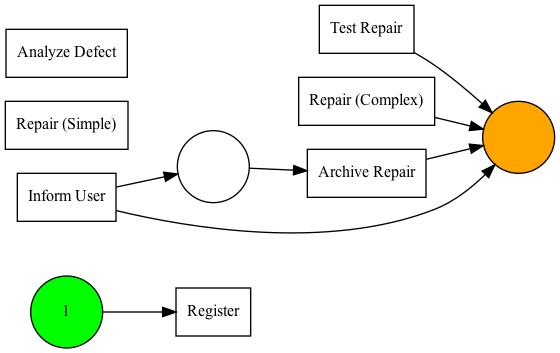

In [31]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log1_DB1)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog1

In [32]:
net, im, fm = alpha_miner.apply(sub_log1_DB1)
fitness = replay_fitness_evaluator.apply(sub_log1_DB1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1_DB1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 37/37 [00:00<00:00, 1184.80it/s]

Fitness of Petrinet is:  69.9104578476094 %
Precision of Petrinet is:  25.95025331602129 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log2

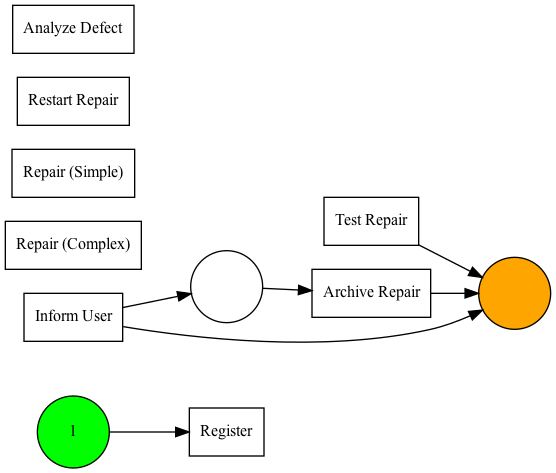

In [33]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log2_DB1)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog2

In [34]:
net, im, fm = alpha_miner.apply(sub_log2_DB1)
fitness = replay_fitness_evaluator.apply(sub_log2_DB1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2_DB1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 134/134 [00:00<00:00, 756.27it/s]

Fitness of Petrinet is:  68.33681280445371 %
Precision of Petrinet is:  22.85400524678177 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log3

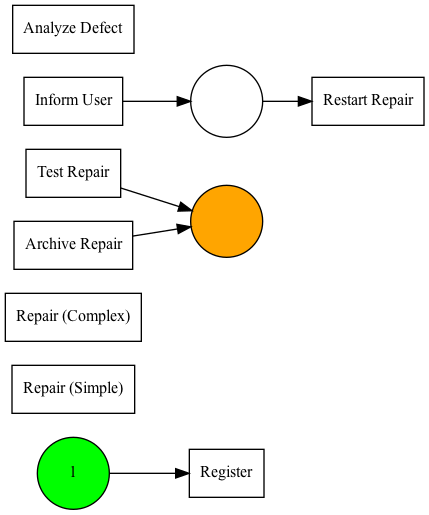

In [35]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log3_DB1)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of Sub Event log 3

In [36]:
net, im, fm = alpha_miner.apply(sub_log3_DB1)
fitness = replay_fitness_evaluator.apply(sub_log3_DB1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log3_DB1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 191/191 [00:00<00:00, 748.83it/s]

Fitness of Petrinet is:  53.988749197719635 %
Precision of Petrinet is:  21.03393360284209 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log 4

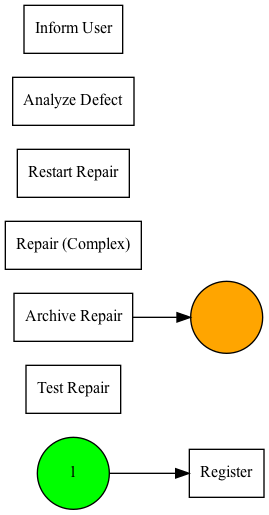

In [37]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log4_DB1)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog 4

In [38]:
net, im, fm = alpha_miner.apply(sub_log4_DB1)
fitness = replay_fitness_evaluator.apply(sub_log4_DB1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log4_DB1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 23/23 [00:00<00:00, 1186.55it/s]

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  16.551724137931036 %
Simplicity of Petrinet is:  100.0 %


# DB Scan 
## Euclidean Distance

In [ ]:
from sklearn.cluster import DBSCAN
clustering_DB_Euclidean = DBSCAN(eps=1.5, min_samples=1, metric ='euclidean').fit(np_vectors)


clustering_DB_Euclidean = clustering_DB_Euclidean.fit_predict(np_vectors)
clustering_DB_Euclidean
# clustered = clustering.labels_
# clustered


array([0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1])

### Size of Clusters

In [ ]:
count_arr_DB2 = np.bincount(clustering_DB_Euclidean)
print(count_arr_DB2)


[19 31  1]


## Creating Sub Event Logs based on Clustering Output

In [ ]:
length1  = count_arr_DB2[0]
length2 = count_arr_DB2[1]
length3 = count_arr_DB2[2]
# length4 = count_arr_DB2[3]
# length5 = count_arr_DB2[4]

sub_log1_DB2 = EventLog()
sub_log2_DB2 = EventLog()
sub_log3_DB2 = EventLog()
# sub_log4_DB2 = EventLog()
# sub_log5_DB2 = EventLog()

for i in range(len(clustering_DB_Euclidean)):
    if clustering_DB_Euclidean[i] == 0:
        sub_log1_DB2.append(log[i])
    
    elif clustering_DB_Euclidean[i] == 1:
        sub_log2_DB2.append(log[i])
        
    elif clustering_DB_Euclidean[i] == 2: 
        sub_log3_DB2.append(log[i])


## Petrinets from Alpha miner on Sub Event Logs generated from DB Scan Euclidean Distance

### Petrinets from Alpha miner on Sub Event Log1

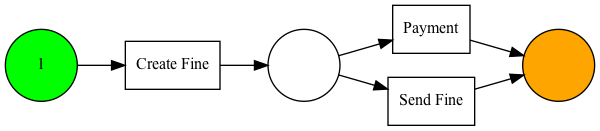

In [ ]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log1_DB2)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog1

In [ ]:
net, im, fm = alpha_miner.apply(sub_log1_DB2)
fitness = replay_fitness_evaluator.apply(sub_log1_DB2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1_DB2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 2/2 [00:00<00:00, 1106.82it/s]

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  100.0 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log2

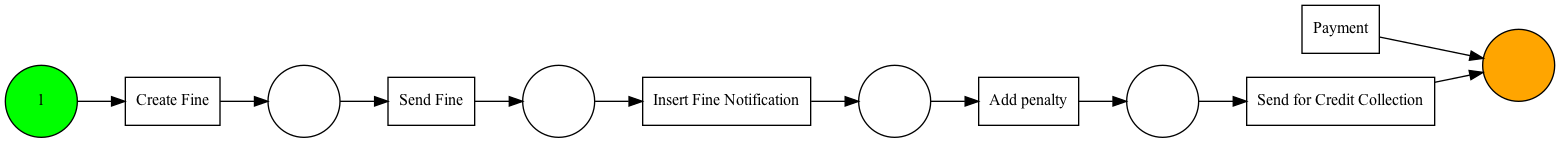

In [ ]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log2_DB2)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog2

In [ ]:
net, im, fm = alpha_miner.apply(sub_log2_DB2)
fitness = replay_fitness_evaluator.apply(sub_log2_DB2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2_DB2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 5/5 [00:00<00:00, 1651.30it/s]

Fitness of Petrinet is:  97.07446808510637 %
Precision of Petrinet is:  59.87261146496815 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log3

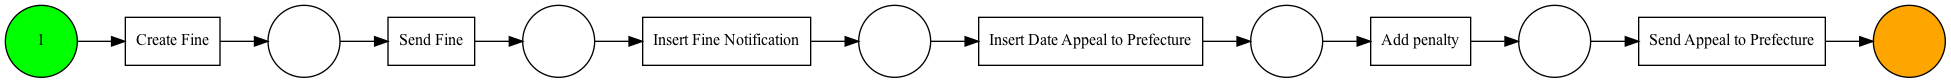

In [ ]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log3_DB2)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of Sub Event log 3

In [ ]:
net, im, fm = alpha_miner.apply(sub_log3_DB2)
fitness = replay_fitness_evaluator.apply(sub_log3_DB2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log3_DB2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 5/5 [00:00<00:00, 421.30it/s]

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  100.0 %
Simplicity of Petrinet is:  100.0 %


# DB Scan
## Jaccard  Distance

In [ ]:
from sklearn.cluster import DBSCAN
clustering_DB_Jaccard = DBSCAN(eps=0.5, min_samples=1, metric ='jaccard').fit(np_vectors)
clustering_DB_Jaccard = clustering_DB_Jaccard.fit_predict(np_vectors)
clustering_DB_Jaccard
# clustered = clustering.labels_
# clustered

array([0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1])

In [ ]:
count_arr_DB3 = np.bincount(clustering_DB_Jaccard)
print(count_arr_DB3)


[ 7 32 12]


## Creating Sub Event Logs based on Clustering Output

In [ ]:
length1  = count_arr_DB3[0]
length2 = count_arr_DB3[1]
length3 = count_arr_DB3[2]
# length4 = count_arr_DB2[3]
# length5 = count_arr_DB2[4]

sub_log1_DB3 = EventLog()
sub_log2_DB3 = EventLog()
sub_log3_DB3 = EventLog()
# sub_log4_DB2 = EventLog()
# sub_log5_DB2 = EventLog()

for i in range(len(clustering_DB_Jaccard)):
    if clustering_DB_Jaccard[i] == 0:
        sub_log1_DB3.append(log[i])
    
    elif clustering_DB_Jaccard[i] == 1:
        sub_log2_DB3.append(log[i])
        
    elif clustering_DB_Jaccard[i] == 2: 
        sub_log3_DB3.append(log[i])


# Petrinets from Alpha miner on Sub Event Logs generated from DB Scan Euclidean Distance

## Petrinets from Alpha miner on Sub Event Log1

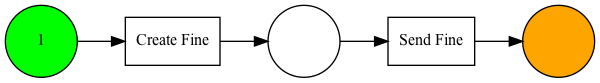

In [ ]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log1_DB3)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog1

In [ ]:
net, im, fm = alpha_miner.apply(sub_log1_DB3)
fitness = replay_fitness_evaluator.apply(sub_log1_DB3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1_DB3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  100.0 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log2

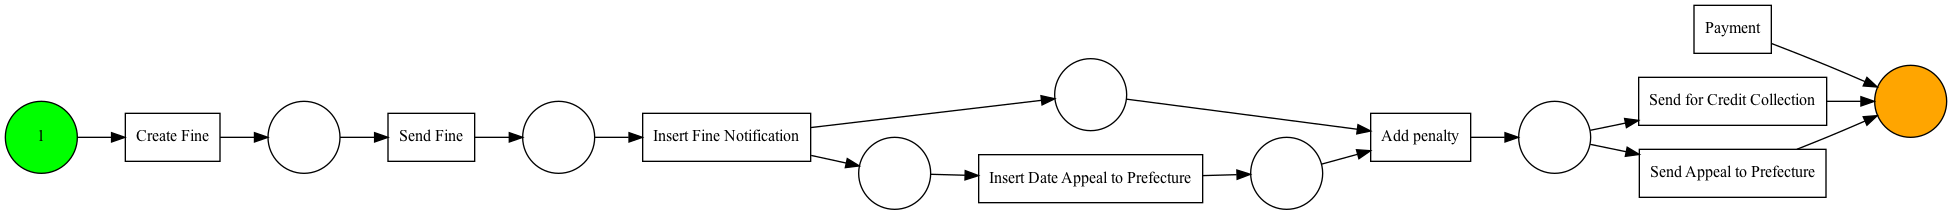

In [ ]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log2_DB3)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog2

In [ ]:
net, im, fm = alpha_miner.apply(sub_log2_DB3)
fitness = replay_fitness_evaluator.apply(sub_log2_DB3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2_DB3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')
#prec

replaying log with TBR, completed variants :: 100%|██████████| 7/7 [00:00<00:00, 1154.55it/s]

Fitness of Petrinet is:  83.57297275248817 %
Precision of Petrinet is:  49.808429118773944 %
Simplicity of Petrinet is:  88.88888888888889 %


## Petrinets from Alpha miner on Sub Event Log3

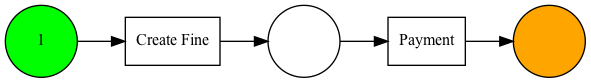

In [ ]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log3_DB3)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of Sub Event log 3

In [ ]:
net, im, fm = alpha_miner.apply(sub_log3_DB3)
fitness = replay_fitness_evaluator.apply(sub_log3_DB3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log3_DB3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  100.0 %
Simplicity of Petrinet is:  100.0 %


# Agglomerative Clustering
## Euclidean

In [ ]:

from sklearn.cluster import AgglomerativeClustering

clustering_Agglomerative = AgglomerativeClustering(n_clusters=3,affinity='euclidean').fit(np_vectors)
clustering_Agglomerative =clustering_Agglomerative.labels_
clustering_Agglomerative

array([0, 1, 2, 1, 1, 0, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 2, 1, 0, 2, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1,
       1, 2, 2, 1, 0, 0, 1])

In [ ]:
count_arr_Aglomerative = np.bincount(clustering_Agglomerative)
print(count_arr_Aglomerative)


[19 23  9]


## Creating Sub Event Logs based on Clustering Output

In [ ]:
length1  = count_arr_Aglomerative[0]
length2 = count_arr_Aglomerative[1]
length3 = count_arr_Aglomerative[2]
# length4 = count_arr_DB2[3]
# length5 = count_arr_DB2[4]

sub_log1_AG = EventLog()
sub_log2_AG = EventLog()
sub_log3_AG = EventLog()
# sub_log4_DB2 = EventLog()
# sub_log5_DB2 = EventLog()

for i in range(len(clustering_Agglomerative)):
    if clustering_Agglomerative[i] == 0:
        sub_log1_AG.append(log[i])
    
    elif clustering_Agglomerative[i] == 1:
        sub_log2_AG.append(log[i])
        
    elif clustering_Agglomerative[i] == 2: 
        sub_log3_AG.append(log[i])


# Petrinets from Alpha miner on Sub Event Logs generated from DB Scan Euclidean Distance

## Petrinets from Alpha miner on Sub Event Log1

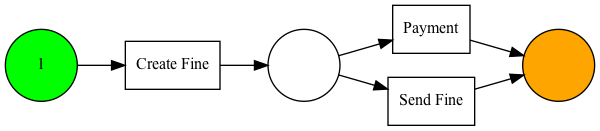

In [ ]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log1_AG)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog1

In [ ]:
net, im, fm = alpha_miner.apply(sub_log1_AG)
fitness = replay_fitness_evaluator.apply(sub_log1_AG, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log1_AG, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 2/2 [00:00<00:00, 422.24it/s]

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  100.0 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log2

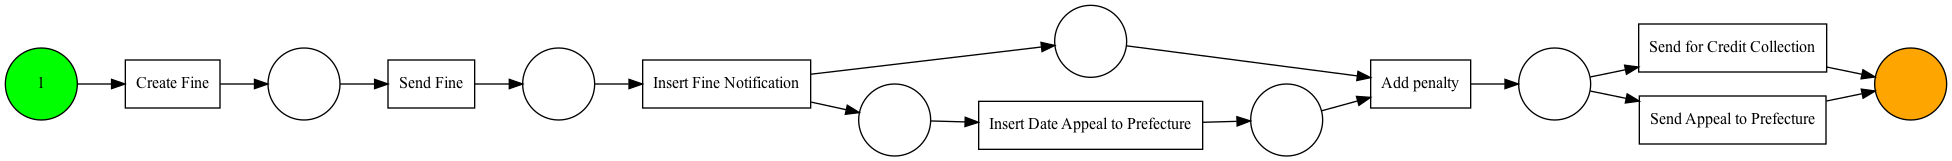

In [ ]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log2_AG)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog2

In [ ]:
net, im, fm = alpha_miner.apply(sub_log2_AG)
fitness = replay_fitness_evaluator.apply(sub_log2_AG, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log2_AG, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 6/6 [00:00<00:00, 2568.47it/s]

Fitness of Petrinet is:  86.41975308641976 %
Precision of Petrinet is:  98.94736842105263 %
Simplicity of Petrinet is:  88.23529411764706 %


## Petrinets from Alpha miner on Sub Event Log3

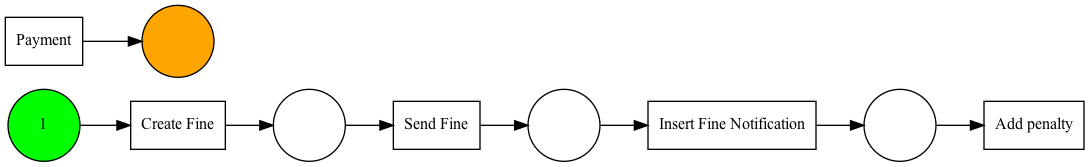

In [ ]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(sub_log3_AG)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of Sub Event log 3

In [ ]:
net, im, fm = alpha_miner.apply(sub_log3_AG)
fitness = replay_fitness_evaluator.apply(sub_log3_AG, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(sub_log3_AG, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 5/5 [00:00<00:00, 3295.85it/s]

Fitness of Petrinet is:  97.87234042553192 %
Precision of Petrinet is:  56.62650602409638 %
Simplicity of Petrinet is:  100.0 %


# Self Organizing Maps - SOM


[array([9, 0]), array([0, 0]), array([2, 6]), array([5, 3]), array([0, 0]), array([9, 9]), array([9, 9]), array([0, 0]), array([0, 9]), array([0, 0]), array([0, 0]), array([0, 0]), array([9, 0]), array([0, 0]), array([2, 6]), array([0, 0]), array([0, 0]), array([0, 0]), array([9, 9]), array([0, 0]), array([9, 9]), array([0, 0]), array([0, 0]), array([9, 9]), array([9, 9]), array([2, 6]), array([0, 0]), array([9, 0]), array([0, 9]), array([2, 6]), array([0, 0]), array([9, 0]), array([0, 0]), array([9, 9]), array([9, 9]), array([0, 0]), array([9, 0]), array([9, 9]), array([9, 9]), array([9, 9]), array([9, 9]), array([2, 6]), array([0, 0]), array([0, 0]), array([0, 0]), array([2, 6]), array([2, 6]), array([0, 0]), array([9, 0]), array([9, 0]), array([0, 0])]


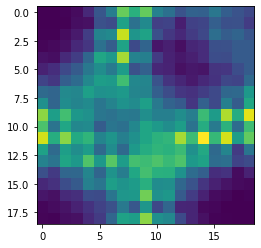

In [ ]:
import susi
import numpy as np
import matplotlib.pyplot as plt
som = susi.SOMClustering()
som.fit(np_vectors)
umat = som.get_u_matrix()
clusters = som.get_bmus(np_vectors)
print(clusters)
plt.imshow(np.squeeze(umat))

### Unique Clusters

In [ ]:
unique_clusters = np.unique(clusters, axis=0)
unique_clusters

array([[0, 0],
       [0, 9],
       [2, 6],
       [5, 3],
       [9, 0],
       [9, 9]])

## Making Sub Event Logs on the basis of SOM Clusters

In [ ]:

som_sub_log1 = EventLog()
som_sub_log2 = EventLog()
som_sub_log3 = EventLog()
som_sub_log4 = EventLog()
som_sub_log5 = EventLog()
som_sub_log6 = EventLog()

for i in range(len(clusters)):
    if clusters[i][0] == 0 and clusters[i][1] ==0:
        som_sub_log1.append(log[i])
    
    elif clusters[i][0] == 0 and clusters[i][1] ==9:
        som_sub_log2.append(log[i])
        
    elif clusters[i][0] == 2 and clusters[i][1] ==6:
        som_sub_log3.append(log[i])

    elif clusters[i][0] == 5 and clusters[i][1] ==3:
        som_sub_log4.append(log[i])

    elif clusters[i][0] == 9 and clusters[i][1] ==0:
        som_sub_log5.append(log[i])

    elif clusters[i][0] == 9 and clusters[i][1] ==9:
        som_sub_log6.append(log[i])

### Checking sizes of clusters

In [ ]:
len(som_sub_log1),len(som_sub_log2),len(som_sub_log3),len(som_sub_log4),len(som_sub_log5),len(som_sub_log6)

(22, 2, 7, 1, 7, 12)

# Petrinets from Alpha miner on Sub Event Logs generated from SOM

## Petrinets from Alpha miner on Sub Event Log1

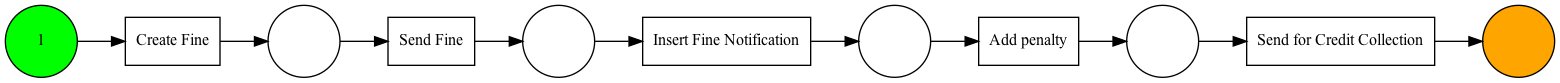

In [ ]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(som_sub_log1)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog1

In [ ]:
net, im, fm = alpha_miner.apply(som_sub_log1)
fitness = replay_fitness_evaluator.apply(som_sub_log1, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log1, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 4/4 [00:00<00:00, 2395.38it/s]

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  100.0 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log2

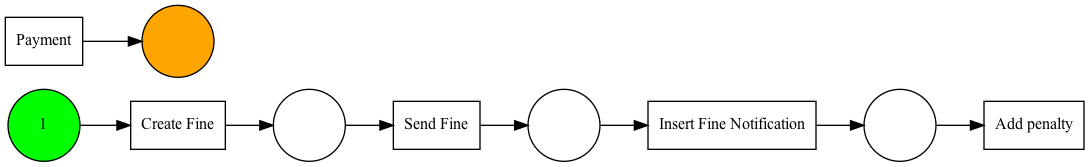

In [ ]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(som_sub_log2)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog2

In [ ]:
net, im, fm = alpha_miner.apply(som_sub_log2)
fitness = replay_fitness_evaluator.apply(som_sub_log2, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log2, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 5/5 [00:00<00:00, 1953.20it/s]

Fitness of Petrinet is:  91.66666666666667 %
Precision of Petrinet is:  60.0 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log3

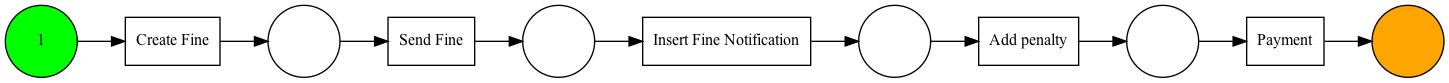

In [ ]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(som_sub_log3)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of Sub Event log 3

In [ ]:
net, im, fm = alpha_miner.apply(som_sub_log3)
fitness = replay_fitness_evaluator.apply(som_sub_log3, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log3, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 4/4 [00:00<00:00, 2093.49it/s]

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  100.0 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log 4

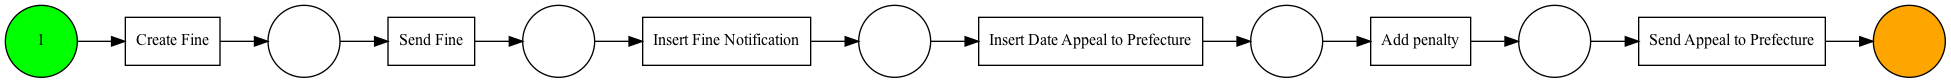

In [ ]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(som_sub_log4)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog 4

In [ ]:
net, im, fm = alpha_miner.apply(som_sub_log4)
fitness = replay_fitness_evaluator.apply(som_sub_log4, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log4, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

replaying log with TBR, completed variants :: 100%|██████████| 5/5 [00:00<00:00, 2332.24it/s]

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  100.0 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log 5

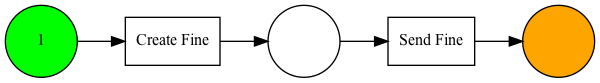

In [ ]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(som_sub_log5)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog 5

In [ ]:
net, im, fm = alpha_miner.apply(som_sub_log5)
fitness = replay_fitness_evaluator.apply(som_sub_log5, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log5, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  100.0 %
Simplicity of Petrinet is:  100.0 %


## Petrinets from Alpha miner on Sub Event Log 6

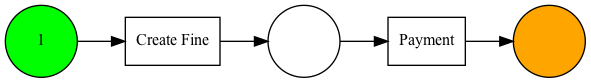

In [ ]:

## Import the petrinet visualizer object
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(som_sub_log6)
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

## Log Fitness and Precision of SubLog 6

In [ ]:
net, im, fm = alpha_miner.apply(som_sub_log6)
fitness = replay_fitness_evaluator.apply(som_sub_log6, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
simp = simplicity_evaluator.apply(net)
prec = precision_evaluator.apply(som_sub_log6, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
print('Fitness of Petrinet is: ', fitness['log_fitness']*100,'%')
print('Precision of Petrinet is: ', prec*100,'%')
print('Simplicity of Petrinet is: ', simp*100,'%')

Fitness of Petrinet is:  100.0 %
Precision of Petrinet is:  100.0 %
Simplicity of Petrinet is:  100.0 %
